# Vision Systems -  Assignment 2

In [1]:
# Importing the libraries for this Jupyter Notebook file
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Displaying on Jupyter Notebook
from IPython.display import display, Image, HTML

## Question 1: Implement the Harris algorithm using OpenCV

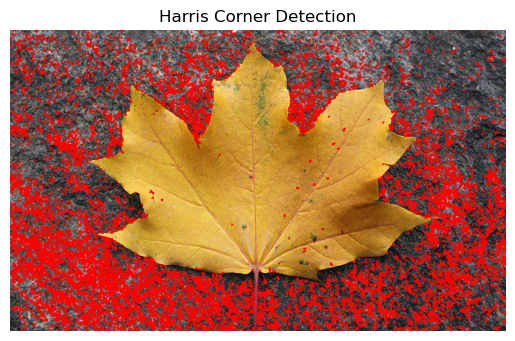

In [2]:
# Load the image
maple_data = cv2.imread('maple.jpg')
k = 0.04 
block_size = 2
ksize = 3

gray = cv2.cvtColor(maple_data, cv2.COLOR_BGR2GRAY)

# Computing the Harris corners
corners = cv2.cornerHarris(gray, blockSize=block_size, ksize=ksize, k=k)

# Dilation
corners = cv2.dilate(corners, None)

# Threshold for an optimal value, it may vary depending on the image
maple_data[corners > 0.01 * corners.max()] = [0, 0, 255]

plt.imshow(cv2.cvtColor(maple_data, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

## Explanation

For this question, we use Harris Corner Detection algorithm for corner detection in the maple image. After loading the image, it undergoes grayscale conversion, a prerequisite for the algorithm. The corner response is computed using the cornerHarris function, with parameters like block size, Sobel operator aperture, and a free parameter k. Dilation enhances corner points, expanding shapes in the image. Thresholding is applied, marking pixels with a corner response greater than 1% of the maximum in red. The resulting image showcases highlighted corners. This algorithm, a vital tool in computer vision, aids in identifying key features, contributing to image analysis and pattern recognition.

## Question 2: Implement Image Pyramid using OpenCV

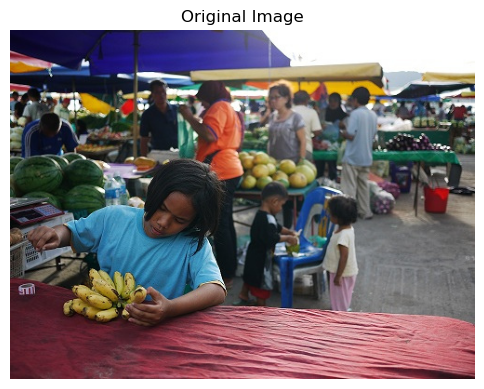

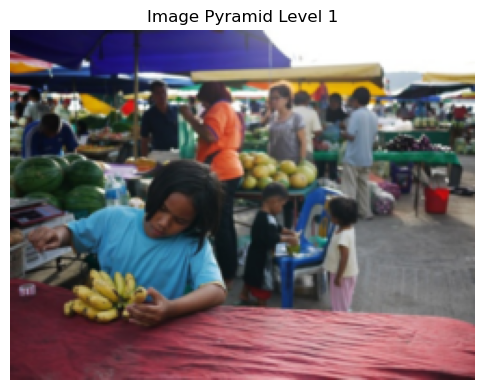

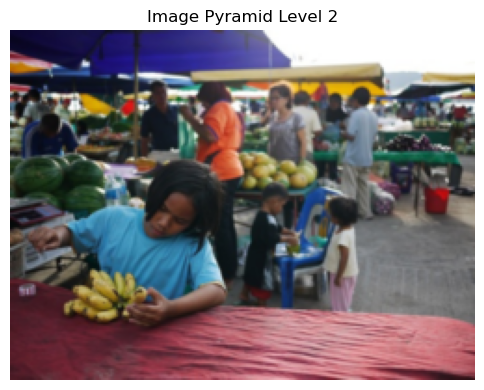

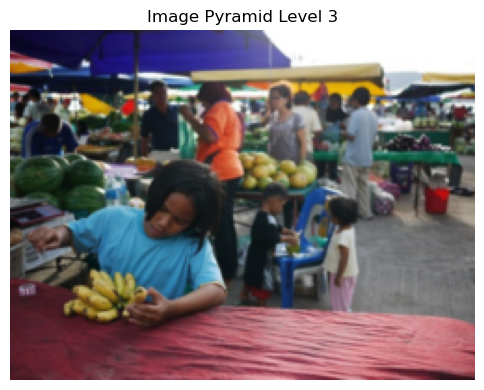

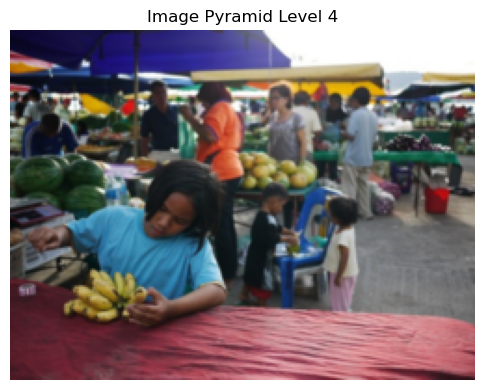

In [3]:
# Load the image and transform
market_data = cv2.imread('mart.jpg')
market_data = cv2.cvtColor(market_data, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(market_data)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Displaying image pyramid  
levels=4
for i in range(levels):
    down_image = cv2.pyrDown(market_data)
    plt.figure(figsize=(6, 6))
    plt.imshow(down_image)
    plt.title(f'Image Pyramid Level {i + 1}')
    plt.axis('off')
    plt.show()

## Explanation

Here we load a mart image and transforms its color scheme. The original image is displayed. Then, an image pyramid is created with five levels. For each level, the image is downsampled using cv2.pyrDown and the resulting pyramidal images are displayed. The pyramid represents the original image at decreasing resolutions offering a multi-scale view. This technique is useful for tasks like image processing and computer vision, allowing analysis at different scales for efficient computation and feature extraction. The code visualizes the image pyramid, providing insights into the hierarchical representation of the original image.

## Question 3: Implement Image Segmentation with Watershed Algorithm using OpenCV

In [4]:
# Load the image and transform
cityView_data = cv2.imread('city_view_1.jpg')
cityView_data = cv2.cvtColor(cityView_data, cv2.COLOR_BGR2RGB)
original = cityView_data.copy()

# Convert the input image to grayscale
gray = cv2.cvtColor(cityView_data, cv2.COLOR_RGB2GRAY)

# Apply thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Dilation
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed algorithm
cv2.watershed(cityView_data, markers)
cityView_data[markers == -1] = [0, 255, 0]

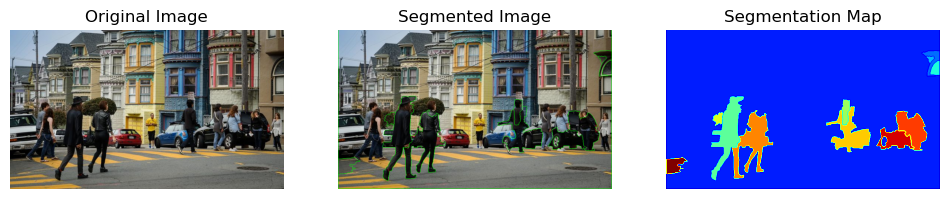

In [5]:
# Plotting the results after segmentation
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(original)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cityView_data)
plt.title('Segmented Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(markers, cmap='jet')
plt.title('Segmentation Map')
plt.axis('off')
plt.show()

## Explanation

Here we perform image segmentation using the Watershed algorithm. Initially, the RGB of car image is loaded and transformed. Grayscale conversion and thresholding are applied to create a binary mask, enhancing object boundaries. Morphological operations remove noise, followed by dilation for background identification. Distances transform highlights potential foreground areas, aiding in foreground segmentation. The watershed algorithm is then applied, and segmented regions are labeled. The original image, segmentation map, and the final segmented image are displayed using Matplotlib. The code effectively separates objects in the image, providing a clear delineation between foreground and background, showcasing the power of the Watershed algorithm in image segmentation.

## Question 4: Implement SIFT algorithm using OpenCV

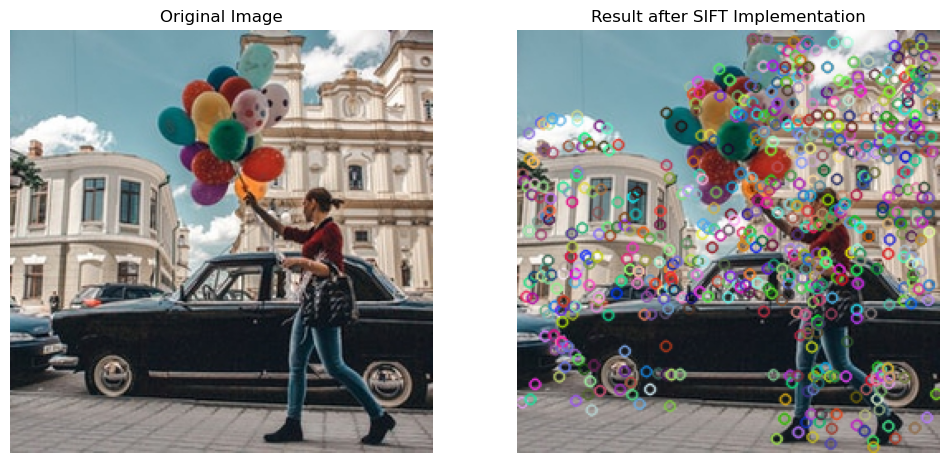

In [6]:
# Load the image
input_img = cv2.imread('city_view.jpg')
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
trans_gray = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints, descriptors and drawing it on the image
keypoints, descriptors = sift.detectAndCompute(trans_gray, None)
img_with_keypoints = cv2.drawKeypoints(input_img, keypoints, None)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_with_keypoints)
plt.title('Result after SIFT Implementation')
plt.axis('off')
plt.show()

## Explanation

Here we utilize the SIFT algorithm for keypoint detection in an image. The city view image is loaded and converted to grayscale. The SIFT detector is initialized, and keypoints with descriptors are computed. These keypoints are then visualized by drawing them on the original image. The resulting image, showcasing distinctive SIFT keypoints, is displayed alongside the original image using Matplotlib. The SIFT algorithm identifies robust features in images, enabling applications like object recognition and image stitching. This code offers a concise demonstration of SIFT capability in detecting and highlighting significant points in a given image

## Question 5: Implement object detection using YOLO on the COCO dataset. Provide theresults for any 5 images (for testing purposes) from the dataset

In [7]:
# Loading COCO images from the dataset
COCO_data = ["coco1.jpg", "coco2.jpg", "coco3.jpg", "coco4.jpg", "coco5.jpg"]

# Download and load YOLO weights and config file
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Download and load the COCO class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

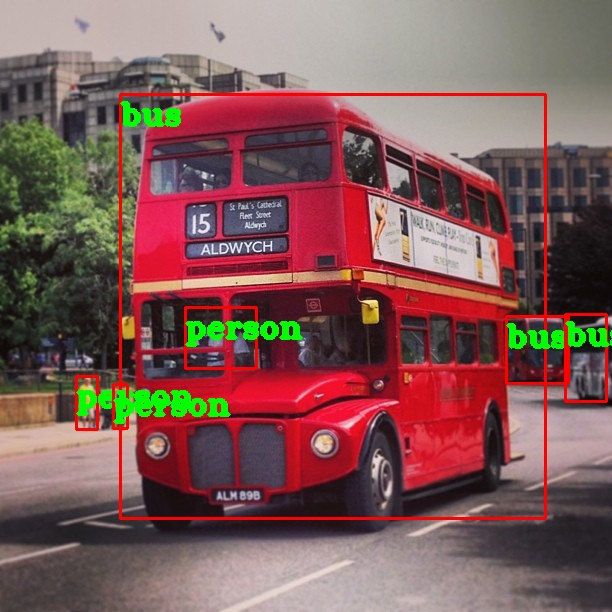

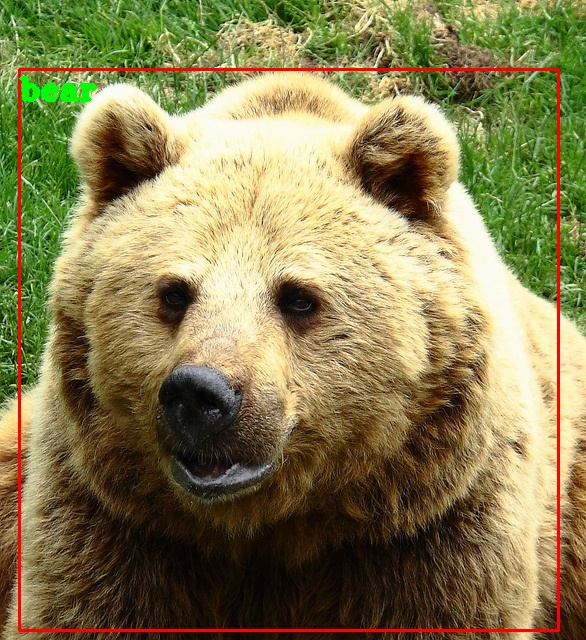

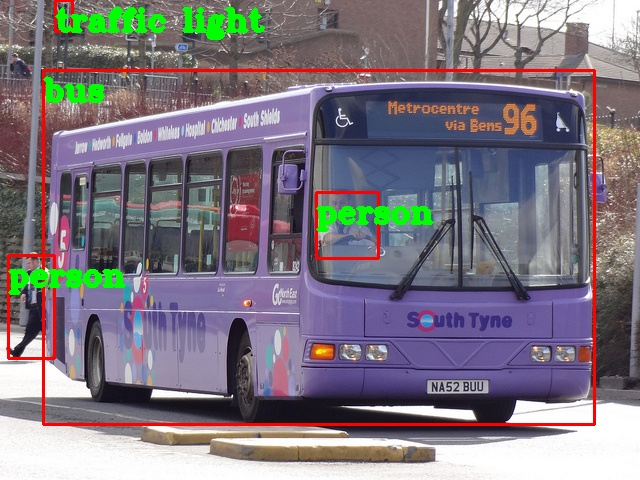

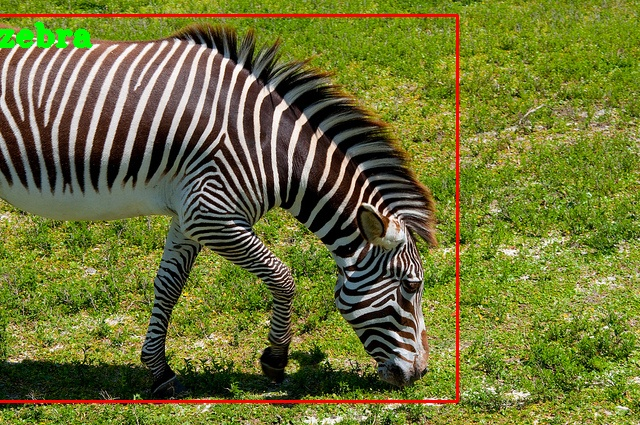

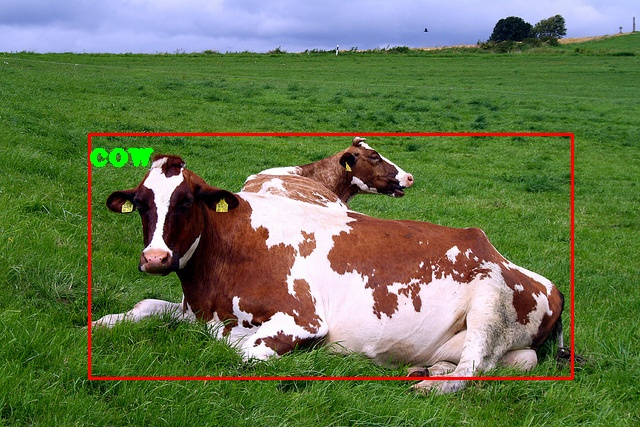

In [8]:
for index, image_path in enumerate(COCO_data):
    # Read image
    img = cv2.imread(image_path)
    height, width, channels = img.shape

    # Perform blob detection on the image
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Initialize lists to store detection results
    class_ids = []
    confidences = []
    boxes = []

    # Iterate through the detection results
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            # Check if the confidence level is above the threshold
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Store the detection information
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-maximum suppression to eliminate redundant boxes
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes and labels on the image
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 255, 0), 3)

    # Display the result of object detection using the COCO model
    display(HTML(f"<h4>YOLO Object Detection - Image {index+1}</h4>"))
    _, encoded_image = cv2.imencode('.jpg', img)
    display(Image(data=encoded_image))


## Explanation

Here we have implemented object detection using the YOLO model on the COCO dataset. YOLO weights and configuration are loaded, and the COCO class labels are obtained. A list of image paths is provided for testing. For each image, blob detection is performed, and the YOLO model predicts bounding boxes, class ID. Non-maximum suppression is applied to remove redundant boxes, and the remaining boxes are annotated on the image. The final result, highlighting detected objects, is displayed for each tested image. This code showcases the YOLO models ability to efficiently detect and classify multiple objects in diverse images from the COCO dataset.